# Flare

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download


In [2]:
/bin/rm -rf 1838 1712
download_chandra_obsid 1838,1712 evt1,asol,bpix,bias,stat,mtl,msk,dtf,pbk,flt,fov


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       15 Mb  ####################          < 1 s  89237.8 kb/s
  asol     fits        2 Mb  ####################          < 1 s  29104.5 kb/s
  bias     fits      494 Kb  ####################          < 1 s  15216.3 kb/s
  bias     fits      434 Kb  ####################          < 1 s  14811.3 kb/s
  bias     fits      427 Kb  ####################          < 1 s  16295.1 kb/s
  bias     fits      426 Kb  ####################          < 1 s  19083.5 kb/s
  bias     fits      425 Kb  ####################          < 1 s  14364.9 kb/s
  bias     fits      420 Kb  ####################          < 1 s  16826.7 kb/s
  mtl      fits      338 Kb  ####################          < 1 s  18388.9 kb/s
  stat     fits      289 Kb  ####################          < 1 s  15971.6 kb/s
  bpix     fits       14 Kb  ####################    

In [3]:
chandra_repro 1838 out= clob+
/bin/rm -rf 1838/{primary,secondary}


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/flare/1838'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/flare/1838/repro/acisf01838_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/flare/1838/repro/acisf01838_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the n

In [4]:
chandra_repro 1712 out=  clob+
/bin/rm -rf 1712/{primary/secondary}


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/flare/1712'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 46 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/flare/1712/repro/acisf01712_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel fil

In [5]:
dmcopy "1838/repro/acisf01838_repro_evt2.fits[energy=500:7000,ccd_id=7]" 1838_c7.fits clob+


## Remove bright soures

In [6]:
apply_fov_limits 1838_c7.fits out=1838_c7.img \
    fov=1838/repro/acisf01838_repro_fov1.fits \
    bin=1 mode=h clob+

Running: apply_fov_limits
  version: 01 April 2020
Observation: ObsId 1838 - ACIS-012367
Using ccd_id=7 from 1838_c7.fits
Using FOV file 1838/repro/acisf01838_repro_fov1.fits.

The output image will have 1111 by 1109 pixels, pixel size of 0.492 arcsec,
    and cover x=3627.5:4738.5:1,y=3838.5:4947.5:1.

Created: 1838_c7.img


In [7]:
vtpdetect 1838_c7.img out=1838_vtp.src mode=h clob+ scale=0.2
dmcopy 1838_vtp.src"[src_region][shape=Polygon]" vtp.reg clob+

In [8]:
ds9 1838_c7.img -region vtp.reg -scale log -zoom 0.5 \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

[1] 13618
[1]+  Done                    ds9 1838_c7.img -region vtp.reg -scale log -zoom 0.5 -saveimage png ds9_01.png


In [9]:
dmcopy "1838_c7.fits[exclude sky=region(vtp.reg)]" 1838_c7_bg.fits clob+

## Create the lightcurve

In [10]:
dmlist 1838_c7_bg.fits"[GTI7]" data

 
--------------------------------------------------------------------------------
Data for Table Block GTI7
--------------------------------------------------------------------------------
 
ROW    START                STOP
 
     1  84245785.9481317699  84253742.5989308059


In [11]:
pset dmextract infile="1838_c7_bg.fits[bin time=84245789.155:84253741.155:259.28]"
pset dmextract outfile=1838_c7_bg.lc
pset dmextract opt=ltc1
dmextract mode=h clob+

## Remove periods of high (or low) count rates

In [12]:
cat << EOM > c1.py
from lightcurves import *
lc_clean("1838_c7_bg.lc")

import matplotlib.pylab as plt
plt.savefig("plot_01.png")
EOM

python c1.py
display < plot_01.png

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  mean           = None
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  plot           = True
  rateaxis       = y
  color          = lime

Total number of bins in lightcurve   = 31
Max length of one bin                = 255.997 s
Num. bins with a smaller exp. time   = 1
Num. bins with exp. time = 0         = 0
Calculated an initial mean (sigma-clipped) rate of 0.463174 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 0.385978 and 0.555808 ct/s
Number of good time bins = 27
Rate filter:  0.3859780335816619 <= count_rate < 0.5558083683575931 
Mean level of filtered lightcurve = 0.45908113689414953 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>0.3859780335816619 && count_rate<0.5558083683575931)

The corresponding times are:
  ((time >= 84245789.155) && (time < 84246307.715)) ; 0.51 ksec, bin 1
  ((time >= 8424656

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  mean           = None
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  outfile        = 1838_c7_bg.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 31
Max length of one bin                = 255.997 s
Num. bins with a smaller exp. time   = 1
Num. bins with exp. time = 0         = 0
Calculated an initial mean (sigma-clipped) rate of 0.463174 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 0.385978 and 0.555808 ct/s
Number of good time bins = 27
Rate filter:  0.3859780335816619 <= count_rate < 0.5558083683575931 
Mean level of filtered lightcurve = 0.45908113689414953 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>0.3859780335816619 && count_rate<0.5558083683575931)

The corresponding times are:
  ((time

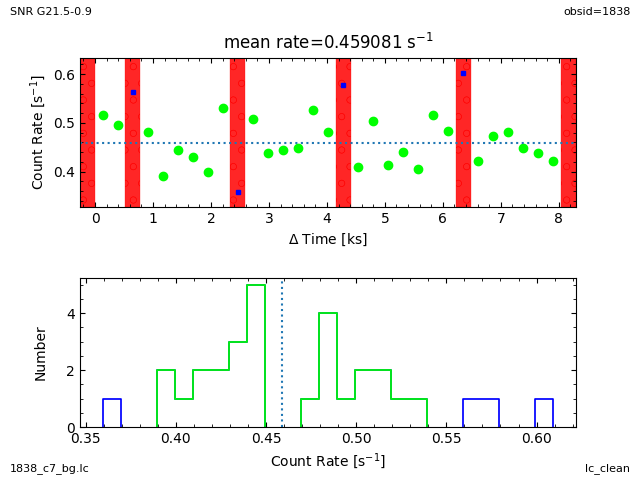

In [13]:
cat << EOM > c2.py
from lightcurves import *
lc_clean("1838_c7_bg.lc", outfile="1838_c7_bg.gti") 

import matplotlib.pylab as plt
plt.savefig("plot_02.png")
EOM

python c2.py
display < plot_02.png

## Running lc_clean via the deflare script

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  mean           = None
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  outfile        = 1838_c7_bg_deflare.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 31
Max length of one bin                = 255.997 s
Num. bins with a smaller exp. time   = 1
Num. bins with exp. time = 0         = 0
Calculated an initial mean (sigma-clipped) rate of 0.463174 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 0.385978 and 0.555808 ct/s
Number of good time bins = 27
Rate filter:  0.3859780335816619 <= count_rate < 0.5558083683575931 
Mean level of filtered lightcurve = 0.45908113689414953 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>0.3859780335816619 && count_rate<0.5558083683575931)

The corresponding times are:


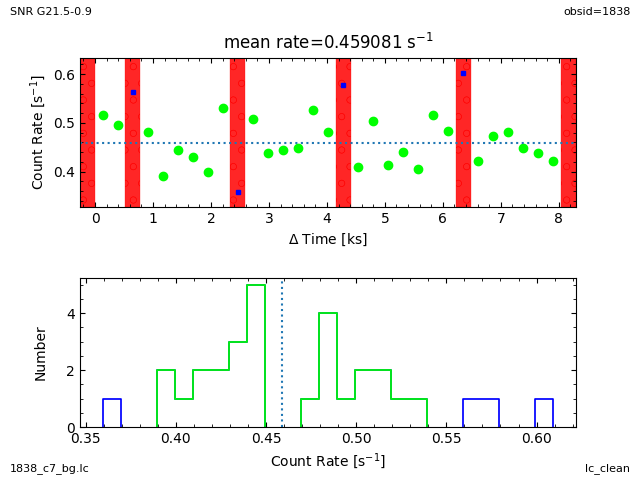

In [14]:
echo yes | deflare 1838_c7_bg.lc 1838_c7_bg_deflare.gti method=clean \
  plot=yes save=deflare_01.png

display < deflare_01.png

## Filter event list

In [15]:
dmcopy "1838_c7.fits[@1838_c7_bg.gti]" 1838_c7_clean.fits clob+

In [16]:
dmkeypar 1838_c7.fits EXPOSURE echo+

7855.8988956987


In [17]:
dmkeypar 1838_c7_clean.fits EXPOSURE echo+

6828.7452726779


---
## Example of Strong Flare

In [18]:
dmcopy 1712/repro/acisf01712_repro_evt2.fits"[energy=500:7000,ccd_id=7]" 1712_flare.fits clob+

In [19]:
cat << EOM > exclude.reg 
# Region file format: CIAO version 1.0
rotbox(4200.3328,4117.9892,1129.5056,74.07019,24.22333)
circle(4076.5,4088.5,316)
circle(4296.5,5024.5,48)
EOM

In [20]:
pset dmextract infile="1712_flare.fits[exclude sky=region(exclude.reg)][bin time=77379634.145:77407432.550:259.28]"
pset dmextract outfile=flare.lc
pset dmextract opt=ltc1
dmextract mode=h clob+


Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  mean           = None
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  plot           = True
  rateaxis       = y
  color          = lime

Total number of bins in lightcurve   = 108
Max length of one bin                = 255.997 s
Num. bins with a smaller exp. time   = 1
Num. bins with exp. time = 0         = 0
Calculated an initial mean (sigma-clipped) rate of 1.39064 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 1.15887 and 1.66877 ct/s
Number of good time bins = 2
Rate filter:  1.1588684690885704 <= count_rate < 1.6687705954875411 
Mean level of filtered lightcurve = 1.3906421629062844 ct/s

         1094.5447585571374 bins.
         Replacing with a width of 0.0109454 count/s
         This may indicate that the lightcurve contains strong flares that
         require manual filtering.

Fraction of bins that are good (0.0185185,

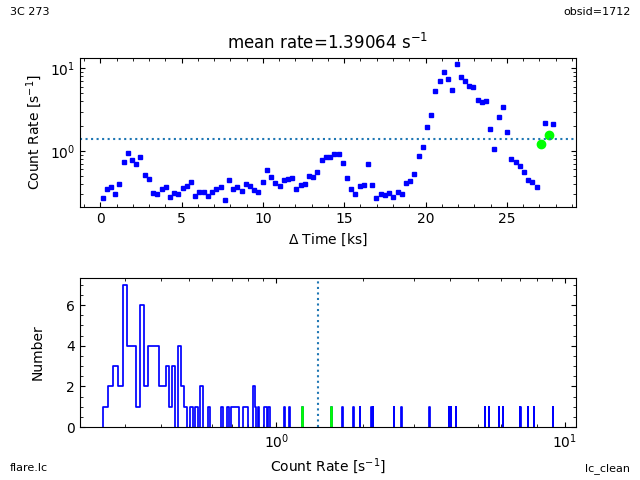

In [21]:
cat << EOM > c3.py
from lightcurves import *
try:
    lc_clean("flare.lc")
except Exception as e:
    print(e)


import matplotlib.pylab as plt
plt.xscale("log")
plt.gcf().axes[0].set_yscale("log")  # change top plot
plt.savefig("plot_03.png")
EOM

python  c3.py
display < plot_03.png

Parameters used to clean the lightcurve are:
  script version = 28 August 2020
  mean           = 0.35
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  outfile        = flare.gti
  plot           = True
  rateaxis       = y
  color          = lime
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 108
Max length of one bin                = 255.997 s
Num. bins with a smaller exp. time   = 1
Num. bins with exp. time = 0         = 0
Using a fixed mean rate of 0.35 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 0.291667 and 0.42 ct/s
Number of good time bins = 42
Rate filter:  0.2916666666666667 <= count_rate < 0.42 
Mean level of filtered lightcurve = 0.350078725333016 ct/s

         1094.5447585571374 bins.
         Replacing with a width of 0.0109454 count/s
         This may indicate that the lightcurve contains strong flares that
         require manual filtering.

GTI limi

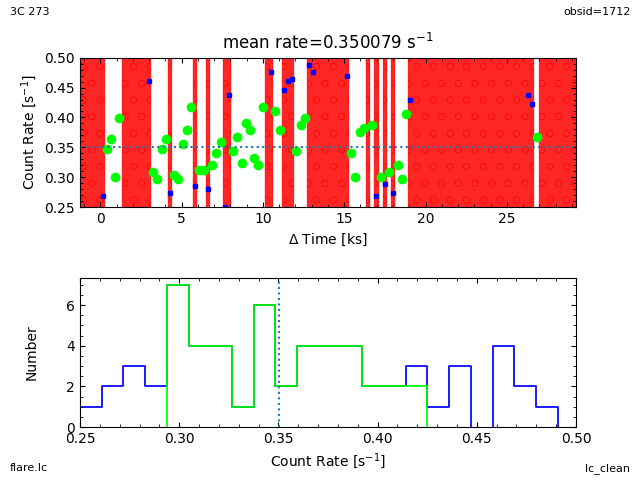

In [22]:
cat << EOM > c4.py
from lightcurves import *
try:
    lc_clean("flare.lc", mean=0.35, outfile="flare.gti")
except Exception as e:
    print(e)


import matplotlib.pylab as plt
plt.xlim(0.25,0.5)
plt.gcf().axes[0].set_ylim(0.25,0.5)  # change top plot
plt.savefig("plot_04.png")
EOM

python c4.py
display < plot_04.png

# Cleanup


In [23]:
/bin/rm -rf 1712 1838 
